In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Activation, Dropout, Dense, Input, Add, Multiply, Concatenate,Lambda
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D,  Flatten, Dot,Reshape
from keras.models import Model
import random, time, os
import numpy as np
from keras import losses
from keras.callbacks import EarlyStopping, ModelCheckpoint


def create_sample_size_dataset(all_ipds, sample_size, n_sample):
    #number_of_samples = int(len(all_ipds) / sample_size)
    all_samples = []
    for p in range(n_sample):
        all_samples.append(all_ipds[p * sample_size:(p + 1) * sample_size])
    return all_samples

def write_array_to_file(array, target, delimiter):
    for k in range(0, len(array)):
        target.write(str(array[k]) + delimiter)
    target.write("\n")

def read_from_file(path):
    with open(path, 'r') as content_file:
        content = content_file.read()
        return content


def create_ipd_dataset(address):
    files = os.listdir(address)
    all_ipds = []
    for f in files:
            ipd = read_from_file(address + f).split(' ')
            all_ipds.extend(convert_stringArrays_to_floatArray(ipd))
    return all_ipds


def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def convert_stringArrays_to_floatArray(array):
    intArray = []

    for k in array:
        if isfloat(k):
            intArray.append(float(k))
    return intArray


def convert_stringArrays_to_intArray(array):
    intArray = []

    for k in array:
        if isfloat(k):
            intArray.append(int(k))
    return intArray

def get_fingerprints_for_ipds(n_train, sample_size, alpha):
    
    #Previous one was all + and the largest value was 50.
   
    fingerprint_output = []
    while len(fingerprint_output) < n_train:
        finger = [random.uniform(0, 250)]
        neg_numbers = 0
        #np.random.laplace(0, std, sample_size)
        finger = np.random.laplace(0, 1, sample_size)
        for i in range(sample_size - 1):
            #if random.randrange(0, 3) == 0:
            '''if random.randrange(0, 2) == 1:
                finger.append(random.uniform(0, alpha))#random.uniform(0, 10)
            else:
                finger.append(-1 * random.uniform(0, alpha))#
            if sum(finger) < 0:
                neg_numbers += 1'''
#             else:
#                 finger.append(0) 
        #if neg_numbers < 50:  ## this can be a hyperparameter
        fingerprint_output.append(finger)
    return fingerprint_output

def get_keys_for_fingerprinting_data(size, key_options):
    selected_keys = []#np.array([key_options[0]])
#     print(selected_keys,type(selected_keys))
    for i in range(size - 1):
        rnd = random.randrange(0, len(key_options))
#         print([key_options[rnd]],type(key_options[0]))
        #selected_keys = np.concatenate((selected_keys, np.array([key_options[rnd]])))
        selected_keys.append(np.array(key_options[rnd]))

    return selected_keys
#from bitarray import bitarray
def get_keys_for_fingerprinting_data_BitVector(size, key_options):
    selected_keys = []#np.array([key_options[0]])
#     print(selected_keys,type(selected_keys))
    for i in range(size):
        rnd = random.randrange(0, len(key_options))
#         print([key_options[rnd]],type(key_options[0]))
        #selected_keys = np.concatenate((selected_keys, np.array([key_options[rnd]])))
        selected_keys.append(bitarray(key_options[rnd]))
    return selected_keys

def get_false_true_data(X, key_options,alpha):
    
    training_keys_true = get_keys_for_fingerprinting_data(size=len(X), key_options=key_options)
    #X_train_true =X# [x for x in X]
    y_train_true = get_fingerprints_for_ipds(len(X), sample_size=len(X[0]),alpha=alpha)#,training_keys=training_keys_true)
    
    ####### changing true trianing to false
    X_train = np.expand_dims(X, axis=1).reshape((-1, len(X[0]), 1))
    y_train = np.expand_dims(y_train_true, axis=1).reshape((-1, len(X[0]), 1))
    #training_keys = training_keys_true#,#np.expand_dims(training_keys_true, axis=1)
    #training_keys_true = np.array(training_keys_true)
    
    return X_train, y_train, training_keys_true

def selecting_valid_fingerprints(key_length):
    all_keys = []
    #address = '/home/fatemeh/MyProjects/Fingerprint/Synthetic dataset/keys/' + str(key_length) + "/"
    key_i =np.zeros(key_length)
    #keys = os.listdir(address)
    for k in range(key_length):
        key_i =np.zeros(key_length,dtype='int8')
        key_i[k] = 1
        #key_i = convert_stringArrays_to_intArray(read_from_file(address + k).split(" "))
        #if key_i [0] == 1:
         #   continue
        all_keys.append(key_i)
       # key_i[k]=0
            
    return all_keys

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [ ]:
import matplotlib.pyplot as plt



plt.plot([1,50,100,200,300,400,600,900], [0,0,0.4,0.98,0.96,0.9,0.89,0.88],marker='o',markersize=4)
#plt.plot([sample_sizes, sample_1000,marker='o',markersize=4)
plt.plot([1,50,100], [0,0,0,0],marker='o',markersize=4)
plt.plot([100,300,600], [0,0,0,0],marker='o',markersize=4)

plt.ylabel('Extraction Rate',fontsize=15)
plt.xlabel('k_w',fontsize=15)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.xscale('log',basex=2)
#legend = ['Train size = 25,000','Train size = 100,000']
plt.legend(['I_W = 1','I_W = 50','I_W = 100'],fontsize=14)#Train', 'Test'], loc='upper left')
plt.show()

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10271129616740617103
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16912667416545406007
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
def get_encoder_decoder_conv_dense_slice_one_conv(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    '''
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    '''
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_2)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec2)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [4]:
def get_encoder_decoder_conv_dense_slice_two_conv(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_3)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec2)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [62]:
def get_encoder_decoder_conv_dense_slice_one_dense_dec(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_3)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    '''
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    '''
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec1)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [70]:
def get_encoder_decoder_conv_dense_slice_three_dense_dec(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_3)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    dense_dec_3 = Dense(512,kernel_regularizer=l2(reg), name='dense_dec_3')(dense_drop_dec2)
    dense_batch_dec3 = BatchNormalization(name='dense_batch_dec3')(dense_dec_3)
    dense_relu_dec3 = Activation('relu', name='dense_relu_dec3')(dense_batch_dec3)
    dense_drop_dec3 = Dropout(0.3, name='dense_drop_dec3')(dense_relu_dec3)
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec3)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [71]:
def get_encoder_decoder_conv_dense_slice_zero_dense_dec(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_3)

    
    '''dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    '''
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(max_pool_dec_3_f)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [51]:
def get_encoder_decoder_conv_dense_slice_zero_conv(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
   
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(x_ipd_reshape)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec2)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])


In [52]:
def get_encoder_decoder_conv_dense_slice_one_dense(sample_size, key_length, chunk,reg):
    p = 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')#,dtype='float64')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    network_noise = Input(shape=(sample_size,), name='input5')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    key1 = Dense(64, name='key1')(Input_key)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    x_slices = []
    for i in range(quant):
        sliced_ipd = Lambda(slice)(ipd)
        x_slices.append(sliced_ipd)
        p += 1
    p = 0
    x_fingerprint = x_slices[0]
    for i in range(quant):
        #sliced_ipd = #Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, x_slices[i]]) 
        ipd1 = Dense(32,kernel_regularizer=l2(reg), name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_key_merge = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        '''
        dense_enc1 = Dense(64, kernel_regularizer=l2(reg), name = 'dense_enc1' + str(p))(ipds_key_merge)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        '''
        
        x_fingerprint_sig = Dense(chunk, kernel_regularizer=l2(reg), name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(ipds_key_merge)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p+=1
       
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size, 1), name='fingerprint')(x_fingerprint)

    x_ipd = Add(name = 'x_ipd')([x_fingerprint, ipd, network_noise])
        
    x_ipd_reshape = Reshape((sample_size, 1),name = 'reshape_dec')(x_ipd)
    
    conv_dec_2 = Conv1D(filters = 20, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_2')(x_ipd_reshape)
    conv_batch_2 = BatchNormalization(name='conv_batch_2_dec')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2_dec')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2_dec')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    
    
    max_pool_dec_3_f = Flatten(name ="flate_max3_dec")(max_pool_dec_3)

    
    dense_dec_1 = Dense(256, kernel_regularizer=l2(reg),name='dense_dec_1')(max_pool_dec_3_f)
    
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1) 
    
    
    dense_dec_2 = Dense(64,kernel_regularizer=l2(reg), name='dense_dec_2')(dense_relu_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec2)

    return Model(inputs=[Input_ipd, Input_key, fingerprint_mult, fingerprint_sub, network_noise], outputs=[x_fingerprint_output, key_hat])#, key_hat])



In [9]:
def compute_extract_rate(keys, true_keys):
    correct = 0 
    for i in range(len(keys)): 
        if np.argmax(keys[i]) == np.argmax(true_keys[i]):
            correct +=1
    return correct/float(len(keys))

def get_mult_sub_for_fingerprinting(n_data, max_delay, chunk, sample_size):
    array_mult, array_sub = [], []
    for x in range(0, n_data):
        array_mult.append([max_delay] * chunk)
        array_sub.append([-max_delay/2] * chunk)
    array_mult = np.array(array_mult)
    array_sub = np.array(array_sub)
    return array_mult, array_sub

def get_noise_simulation_array(n_data, std, sample_size):
    noise = []
    for x in range(0, n_data):
        #noise.append(np.random.normal(0, std, sample_size))
        #noise.append(np.random.uniform(0, std, sample_size))
        noise.append(np.random.laplace(0, std, sample_size));
    noise = np.array(noise)
    return noise
def mean_pred_loss(y_true, y_pred):
    #when the coeficent is smaller, performance is better. When increasing, noise improves
    sum_abs = K.abs(y_pred)
    tmp =  K.mean(sum_abs) - 0.3 * K.mean(y_pred)# + K.epsilon()
    return 100 * (K.abs(K.mean(y_pred)))# 1/tmp  keras.losses.mean_absolute_error(y_true, y_pred) + 
from keras import backend as K
K.tensorflow_backend._get_available_gpus()



[]

In [5]:
path = "/home/fatemeh/MyProjects/Fingerprint/models/"
rate = '10'
all_ipds_for_test = create_ipd_dataset(
    address='/home/fatemeh/MyProjects/Fingerprint/Synthetic dataset/in/' + rate + '/test/')
all_ipds_for_train = create_ipd_dataset(
    address='/home/fatemeh/MyProjects/Fingerprint/Synthetic dataset/in/' + rate + '/train/')



In [6]:
import math

def compute_diff(str1,str2):
   
    str22 = ""
    if len(str1)>len(str2):
        for i in range(len(str1)-len(str2)):
            str22+='0'
    str22+=str2
    str11 = ""
    if len(str2)>len(str1):
        for i in range(len(str2)-len(str1)):
            str11 += '0'
    str11 += str1
    leng = len(str11)
    diff = 0
    #print(leng, len(str22),str22, str11)
    for i in range(leng):
        if str11[i] != str22[i]:
            diff+=1
    
    return diff
def bit_rate_error(ext_keys, true_keys,key_bin_size):
    error_bits = 0
    all_bits = 0
    for f in range(len(ext_keys)):
        ext = bin(np.argmax(ext_keys[f]))[2:]
        tru = bin(np.argmax(true_keys[f]))[2:]
        
        error_bits += compute_diff(ext,tru)
        all_bits += key_bin_size
    return error_bits/float(all_bits)

In [16]:
n_true_train, n_test = 100000, 5000
sample_size= 400#*32#* 32

X_train_all = create_sample_size_dataset(all_ipds_for_train, sample_size = sample_size,n_sample=n_true_train)
X_test_all = create_sample_size_dataset(all_ipds_for_test, sample_size = sample_size,n_sample=n_test)
print(len(X_train_all), len(X_test_all), "Numbre of training and testing data")

100000 5000 Numbre of training and testing data


In [10]:
from keras.regularizers import l2
import keras.backend as K
from keras import optimizers
import time
import datetime

alpha, chunk = 25, 10
std, max_fing_delay = 1, alpha
array_mult_test, array_sub_test = get_mult_sub_for_fingerprinting(n_test, max_delay=max_fing_delay, chunk=chunk,
                                                                  sample_size=sample_size)
noise_for_test = get_noise_simulation_array(n_test, std=std, sample_size=sample_size)
array_mult_train, array_sub_train = get_mult_sub_for_fingerprinting(n_true_train, max_delay=max_fing_delay, chunk=chunk,
                                                                    sample_size=sample_size)
noise_for_train = get_noise_simulation_array(n_true_train, std=std, sample_size=sample_size)
print("Noise and subtract and multiply arrays are built!...")

key_length  = 1024#*32#1024*16
beg = time.time()
key_options = selecting_valid_fingerprints(key_length = key_length)
X_train, y_train, train_keys = get_false_true_data(X_train_all, key_options, alpha=alpha)#get_only_true_data
print(time.time() - beg)
train_keys = np.array(train_keys)

Noise and subtract and multiply arrays are built!...
2.5301716327667236


In [13]:
r = 1e-6
#histories=[]
n_true_train, n_test = 25000 - 1, 5000 - 1
t = n_true_train
beg_time = time.time()
x_fing_w, key_hat_w, epoch, batch = 1, 200, 100, 512
std, max_fing_delay = 1, alpha

print("Date : ", datetime.datetime.now())

model_10 = get_encoder_decoder_conv_dense_slice_two_conv(sample_size=sample_size, key_length=key_length, chunk=chunk, reg = r)
# losses.mean_squared_error# 0.001
adam =optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, decay = 0.0, amsgrad=False)

model_10.compile(optimizer=adam, loss={'fingerprint': mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
          loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w},metrics=['accuracy'])#acc

# model.summary()
print("Model %s is Built and Compiled in %f" % (t, time.time() - beg_time))
beg_time = time.time()

history = model_10.fit([X_train[0:t], train_keys[0:t], array_mult_train[0:t], array_sub_train[0:t], noise_for_train[0:t]],
      [y_train[0:t], train_keys[0:t]], epochs=epoch, validation_split=0.1,batch_size=batch)  # callbacks=callbacks_list, verbose=0)
#models.append(model_10)

histories.append(history)

print("Time to Fit the Model", time.time() - beg_time)


Date :  2019-12-02 20:50:07.434451
Model 24999 is Built and Compiled in 6.941010
Train on 22499 samples, validate on 2500 samples
Epoch 1/100
22499/22499 [==============================] - 26s 1ms/step - loss: 1399.7016 - fingerprint_loss: 5.5400 - key_hat_loss: 6.9708 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 8.8893e-04 - val_loss: 1389.3277 - val_fingerprint_loss: 1.5127 - val_key_hat_loss: 6.9391 - val_fingerprint_acc: 0.0000e+00 - val_key_hat_acc: 8.0000e-04
Epoch 2/100
22499/22499 [==============================] - 10s 425us/step - loss: 1385.1557 - fingerprint_loss: 3.0016 - key_hat_loss: 6.9108 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 0.0020 - val_loss: 1392.6135 - val_fingerprint_loss: 2.2288 - val_key_hat_loss: 6.9519 - val_fingerprint_acc: 0.0000e+00 - val_key_hat_acc: 0.0000e+00
Epoch 3/100
22499/22499 [==============================] - 9s 421us/step - loss: 1377.1210 - fingerprint_loss: 2.6754 - key_hat_loss: 6.8722 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 0.0024

NameError: name 'histories' is not defined

In [15]:
x_test = np.array(X_test_all[0:n_test-2]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test)
pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x22, keys_true = pred[0], pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)
print("key_length: ", key_length)
print("Ext Rate:  ", ext_rate)
key_bin_size = math.log2(key_length)
error = bit_rate_error(keys_true,test_keys, key_bin_size)
print('Error:', error)

key_length:  1024
Ext Rate:   0.4926956173704223
Error: 0.2539523714228537


In [17]:
n_true_train, n_test = 100000, 5000
sample_size= 400#*32#* 32

X_train_all = create_sample_size_dataset(all_ipds_for_train, sample_size = sample_size,n_sample=n_true_train)
X_test_all = create_sample_size_dataset(all_ipds_for_test, sample_size = sample_size,n_sample=n_test)
print(len(X_train_all), len(X_test_all), "Numbre of training and testing data")

alpha, chunk = 25, 10
std, max_fing_delay = 1, alpha
array_mult_test, array_sub_test = get_mult_sub_for_fingerprinting(n_test, max_delay=max_fing_delay, chunk=chunk,
                                                                  sample_size=sample_size)
noise_for_test = get_noise_simulation_array(n_test, std=std, sample_size=sample_size)
array_mult_train, array_sub_train = get_mult_sub_for_fingerprinting(n_true_train, max_delay=max_fing_delay, chunk=chunk,
                                                                    sample_size=sample_size)
noise_for_train = get_noise_simulation_array(n_true_train, std=std, sample_size=sample_size)
print("Noise and subtract and multiply arrays are built!...")



100000 5000 Numbre of training and testing data
Noise and subtract and multiply arrays are built!...


In [18]:
key_length  = 1024#*32#1024*16
beg = time.time()
key_options = selecting_valid_fingerprints(key_length = key_length)
X_train, y_train, train_keys = get_false_true_data(X_train_all, key_options, alpha=alpha)#get_only_true_data
print(time.time() - beg)
train_keys = np.array(train_keys)

4.698707103729248


In [19]:
print(key_length, sample_size)

1024 400


In [20]:
n_true_train, n_test = 25000-1, 5000-1
t = n_true_train
beg_time = time.time()
x_fing_w, key_hat_w, epoch, batch = 1, 200, 100, 512
std, max_fing_delay = 1, alpha

print("Date : ", datetime.datetime.now())

model_10 = get_encoder_decoder_conv_dense_slice_two_conv(sample_size=sample_size, key_length=key_length, chunk=chunk, reg = r)
# losses.mean_squared_error# 0.001
adam =optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, decay = 0.0, amsgrad=False)

model_10.compile(optimizer=adam, loss={'fingerprint': mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
          loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w},metrics=['accuracy'])#acc

# model.summary()
print("Model %s is Built and Compiled in %f" % (t, time.time() - beg_time))
beg_time = time.time()

history_dense_decoder = model_10.fit([X_train[0:t], train_keys[0:t], array_mult_train[0:t], array_sub_train[0:t], noise_for_train[0:t]],
      [y_train[0:t], train_keys[0:t]], epochs=epoch, validation_split=0.1,batch_size=batch)  # callbacks=callbacks_list, verbose=0)
models.append(model_10)

print("Time to Fit the Model", time.time() - beg_time)

Date :  2019-12-02 21:33:19.313430
Model 24999 is Built and Compiled in 14.352504
Train on 22499 samples, validate on 2500 samples
Epoch 1/100
22499/22499 [==============================] - 55s 2ms/step - loss: 1398.0759 - fingerprint_loss: 3.7051 - key_hat_loss: 6.9718 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 6.6670e-04 - val_loss: 1391.9642 - val_fingerprint_loss: 2.4587 - val_key_hat_loss: 6.9475 - val_fingerprint_acc: 0.0000e+00 - val_key_hat_acc: 8.0000e-04
Epoch 2/100
22499/22499 [==============================] - 18s 802us/step - loss: 1383.6756 - fingerprint_loss: 4.4357 - key_hat_loss: 6.8962 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 0.0022 - val_loss: 1394.0039 - val_fingerprint_loss: 1.9250 - val_key_hat_loss: 6.9604 - val_fingerprint_acc: 0.0000e+00 - val_key_hat_acc: 4.0000e-04
Epoch 3/100
22499/22499 [==============================] - 18s 801us/step - loss: 1372.5098 - fingerprint_loss: 4.2736 - key_hat_loss: 6.8412 - fingerprint_acc: 0.0000e+00 - key_hat_acc: 0.00

NameError: name 'models' is not defined

In [21]:
x_test = np.array(X_test_all[0:n_test-2]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test)
pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x22, keys_true = pred[0], pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)
print("key_length: ", key_length)
print("Ext Rate:  ", ext_rate)
key_bin_size = math.log2(key_length)
error = bit_rate_error(keys_true,test_keys, key_bin_size)
print('Error:', error)

key_length:  1024
Ext Rate:   0.884930958575145
Error: 0.05711426856113668


In [ ]:
key_length  = 512*32#1024*16
beg = time.time()
key_options = selecting_valid_fingerprints(key_length = key_length)
X_train, y_train, train_keys = get_false_true_data(X_train_all, key_options, alpha=alpha)#get_only_true_data
print(time.time() - beg)
train_keys = np.array(train_keys)

In [105]:
keys = [128, 512, 512*4, 512*32]# I should run the 1024 too
# key_length = 128
for key_length in keys:
    
    n_true_train = 25000 
    t = n_true_train
    beg = time.time()
    key_options = selecting_valid_fingerprints(key_length = key_length)
    X_train, y_train, train_keys = get_false_true_data(X_train_all, key_options, alpha=alpha)#get_only_true_data
    print(time.time() - beg)
    train_keys = np.array(train_keys)
    
    print("Date : ", datetime.datetime.now())

    model_10 = get_encoder_decoder_conv_dense_slice_two_conv(sample_size=sample_size, key_length=key_length, chunk=chunk, reg = r)
    # losses.mean_squared_error# 0.001
    adam =optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, decay = 0.0, amsgrad=False)

    model_10.compile(optimizer=adam, loss={'fingerprint': mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
              loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w},metrics=['accuracy'])#acc

    # model.summary()
    print("Model %s is Built and Compiled in %f" % (t, time.time() - beg_time))
    beg_time = time.time()

    history_dense_decoder = model_10.fit([X_train[0:t], train_keys[0:t], array_mult_train[0:t], array_sub_train[0:t], noise_for_train[0:t]],
          [y_train[0:t], train_keys[0:t]], epochs=epoch, validation_split=0.1,batch_size=batch,verbose=0)  # callbacks=callbacks_list, verbose=0)
    #models.append(model_10)

    print("Time to Fit the Model", time.time() - beg_time)
    
    
    
    x_test = np.array(X_test_all[0:n_test-2]).reshape((-1, sample_size, 1))
    key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
    test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
    noise_for_test = np.squeeze(noise_for_test)
    pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

    fingerprint_x22, keys_true = pred[0], pred[1]
    ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)
    print("key_length: ", key_length)
    print("Ext Rate:  ", ext_rate)
    key_bin_size = math.log2(key_length)
    error = bit_rate_error(keys_true,test_keys, key_bin_size)
    print('Error:', error)

5.563378095626831
Date :  2019-12-02 16:37:25.433005
Model 25000 is Built and Compiled in 73173.561874
Time to Fit the Model 1575.06112074852
key_length:  128
Ext Rate:   0.9911947168300981
Error: 0.004402641584950971
5.344136476516724
Date :  2019-12-02 17:05:27.457042
Model 25000 is Built and Compiled in 1682.027918
Time to Fit the Model 1624.5191638469696
key_length:  512
Ext Rate:   0.8931358815289173
Error: 0.05263157894736842
5.41720175743103
Date :  2019-12-02 17:34:19.318069
Model 25000 is Built and Compiled in 1731.909239
Time to Fit the Model 1664.5833988189697
key_length:  2048
Ext Rate:   0.4790874524714829
Error: 0.2621027161751596
6.689152479171753
Date :  2019-12-02 18:03:55.645071
Model 25000 is Built and Compiled in 1776.367744
Time to Fit the Model 1776.4521505832672
key_length:  16384
Ext Rate:   0.005003001801080648
Error: 0.49611195288601734


In [ ]:
For 50,000
[128, 512, 512*4, 512*32] 

key_length:  128
Ext Rate:   0.9903942365419252
Error: 0.0050601789645215705

key_length:  512
Ext Rate:   0.9479687812687613
Error: 0.026571498454628334

key_length:  2048
Ext Rate:   0.8282969781869122
Error: 0.08494187421543835

key_length:  16384
Ext Rate:   0.12607564538723234
Error: 0.4401926870407959

    
train = 25, 000
ext = [0.99, 0.89, 0.48,0.005]
err = [0.004,0.05, 0.26,0.5]
    
train = 50, 000
Ext_Rate = [0.99, 0.95, 0.83, 0.12]
error = [0.005, 0.026, 0.085, 0.44]

train = 100, 000
ext_rate = [0.994, 0.95, 0.84, 0.5]
error = [0.003, 0.02, 0.09,0.25 ]


###bit_rate-error = 0.0007004202521512907 and ext_rate: 0.0.9987992795677406 for : 64
### bit_rate-error = 0.0031161554075302324 and ext_rate: 0.9939963978387032 for : 128
### bit_rate-error = 0.0095 and ext_rate: 0.9815889533720232 for : 256
###  bit rate error:0.022 andExt Rate: 0.95    : 512
### bit rate error: 0.009443777511004402  and ext_rate: 0.98: 512*2
###bit rate error: 0.08749249549729837 and Ext Rate:   0.839703822293376  : 512*4
###bit rate error: 0.093 and Ext Rate:  0.81   : 512*8
### bit rate error: 0.248        Ext rate:   0.498       : 512*32

In [ ]:
import matplotlib.pyplot as plt

#train = 25, 000
ext = [0.99, 0.89,0.75, 0.48,0.005]
err = [0.004,0.05, 0.26, 50]

#train = 50, 000
Ext_Rate = [0.99, 0.95,0.9, 0.83, 0.12]
error = [0.005, 0.026, 0.085, 0.44]

#train = 100, 000
ext_rate = [0.994, 0.98,0.97 0.84, 0.5]
error = [0.003, 0.02, 0.09,0.25 ]
# Plot training & validation loss values history2_just_last_conv
#plt.plot(history.history['loss'])
plt.plot([128, 512,512*2, 512*4, 512*32],ext,marker='o',markersize=4)##our arch

plt.plot([128, 512, 512*2,512*4, 512*32],Ext_Rate,marker='s',markersize=4)# with just one conv
plt.plot([128, 512, 512*2,512*4, 512*32],ext_rate,marker='v',markersize=4)

#plt.title('Model loss',fontsize=15)
plt.ylabel('Extraction Rate',fontsize=15)
plt.xlabel('Key Length',fontsize=15)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xscale('log',basex=2)
legend = ['Train size = 25,000','Train size = 50,000','Train size = 100,000']
plt.legend(legend,fontsize=14)#Train', 'Test'], loc='upper left')
plt.show()

In [98]:
#regs = [1e-6]#0.01, 0.5, 1e-3, 1e-4, 1e-5, 1e-6 too. Looks like 1e-6 is the best (maybe 1e-7, 1e-8 too)
#models = []
r = 1e-6

n_true_train, n_test = 100000-1, 5000-1
t = n_true_train
beg_time = time.time()
x_fing_w, key_hat_w, epoch, batch = 1, 200, 100, 512
std, max_fing_delay = 1, alpha

print("Date : ", datetime.datetime.now())

model_10 = get_encoder_decoder_conv_dense_slice_two_conv(sample_size=sample_size, key_length=key_length, chunk=chunk, reg = r)
# losses.mean_squared_error# 0.001
adam =optimizers.Adam(lr = 1e-3, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7, decay = 0.0, amsgrad=False)

model_10.compile(optimizer=adam, loss={'fingerprint': mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
          loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w},metrics=['accuracy'])#acc

# model.summary()
print("Model %s is Built and Compiled in %f" % (t, time.time() - beg_time))
beg_time = time.time()

history_dense_decoder = model_10.fit([X_train[0:t], train_keys[0:t], array_mult_train[0:t], array_sub_train[0:t], noise_for_train[0:t]],
      [y_train[0:t], train_keys[0:t]], epochs=epoch, validation_split=0.1,batch_size=batch)  # callbacks=callbacks_list, verbose=0)
models.append(model_10)

print("Time to Fit the Model", time.time() - beg_time)

#### This is when we test encoder and decoder together using the same model: model_encoder_decoder

    
# avg_d, max_d = compute_delay_on_each_packet(fingerprint_x2)

#fingerprint_x2 = adjust_fingerprint_delays(fingerprint_x2)
#avg_d, max_d = compute_delay_on_packets(fingerprint_x2)
#learning_rates = [1e-3]# e-3 reached 0.21 when epochs = 50 [1e-2, e-3, e-5,e-4,1e-5, 5e-3, 2e-3]


Date :  2019-12-01 15:49:45.558450
Model 99999 is Built and Compiled in 7.056780
Train on 89999 samples, validate on 10000 samples
Epoch 1/100
89999/89999 [==============================] - 130s 1ms/step - loss: 1952.7144 - fingerprint_loss: 2.2552 - key_hat_loss: 9.7523 - fingerprint_accuracy: 0.0000e+00 - key_hat_accuracy: 4.4445e-05 - val_loss: 1964.5285 - val_fingerprint_loss: 14.9786 - val_key_hat_loss: 9.7487 - val_fingerprint_accuracy: 0.0000e+00 - val_key_hat_accuracy: 3.0000e-04
Epoch 2/100
89999/89999 [==============================] - 53s 589us/step - loss: 1917.8088 - fingerprint_loss: 2.8457 - key_hat_loss: 9.5748 - fingerprint_accuracy: 0.0000e+00 - key_hat_accuracy: 1.6667e-04 - val_loss: 1979.8661 - val_fingerprint_loss: 4.6276 - val_key_hat_loss: 9.8774 - val_fingerprint_accuracy: 0.0000e+00 - val_key_hat_accuracy: 0.0000e+00
Epoch 3/100
89999/89999 [==============================] - 52s 578us/step - loss: 1892.1041 - fingerprint_loss: 2.8928 - key_hat_loss: 9.4460 - f

In [99]:
x_test = np.array(X_test_all[0:n_test-2]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test)
pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x22, keys_true = pred[0], pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)

print("Ext Rate:  ", ext_rate)
###bit_rate-error = 0.0007004202521512907 and ext_rate: 0.0.9987992795677406 for : 64
### bit_rate-error = 0.0031161554075302324 and ext_rate: 0.9939963978387032 for : 128
### bit_rate-error = 0.0095 and ext_rate: 0.9815889533720232 for : 256
###  bit rate error:0.022 andExt Rate: 0.95    : 512
### bit rate error: 0.009443777511004402  and ext_rate: 0.98: 512*2
###bit rate error: 0.08749249549729837 and Ext Rate:   0.839703822293376  : 512*4
###bit rate error: 0.093 and Ext Rate:  0.81   : 512*8
### bit rate error: 0.248        Ext rate:   0.498       : 512*32
key_bin_size = math.log2(key_length)
error = bit_rate_error(keys_true,test_keys, key_bin_size)
print('Error:', error)

Ext Rate:   0.49809885931558934
Error: 0.24860630664112754


In [ ]:
key_length = 1024 # to test sample size
sample_size = [100, 200]#, 600, 900]

for sample size 100 and train 100,000:
 key_length:  1024
Ext Rate:   0.48789273564138486
Error: 0.25533319991995196   
    
for sample size 100 and train 25 000
Ext Rate:   0.18551130678407043
Error: 0.40908545127076246
for sample size 200  train 100, 00
key_length:  1024
Ext Rate:   0.816690014008405
Error: 0.09115469281568941

for sample size 200  train 25, 00
key_length:  1024
Ext Rate:   0.49109465679407643
Error: 0.25451270762457473

sample size 300
### bit rate error: 0.009443777511004402  and ext_rate: 0.98: 512*2


sample 400
key_length:  1024
Ext Rate:   0.9775865519311587
Error: 0.0114268561136682

25000:
Ext Rate:   0.884930958575145
Error: 0.05711426856113668   

In [ ]:
import matplotlib.pyplot as plt

sample_25000 = [0.18, 0.49, 0.81, 0.88]
sample_1000 = [0.49, 0.82, 0.98, 0.98]
sample_sizes = [100, 200, 300, 400]

err_25 = [0.4, 0.25, 0.08, 0.04]
err_100 = [0.25, 0.09, 0.009, 0.008]

plt.plot(sample_sizes, sample_25000,marker='o',markersize=4)
plt.plot([sample_sizes, sample_1000,marker='o',markersize=4)

plt.ylabel('Extraction Rate',fontsize=15)
plt.xlabel('Flow Length',fontsize=15)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.xscale('log',basex=2)
legend = ['Train size = 25,000','Train size = 100,000']
plt.legend(legend,fontsize=14)#Train', 'Test'], loc='upper left')
plt.show()

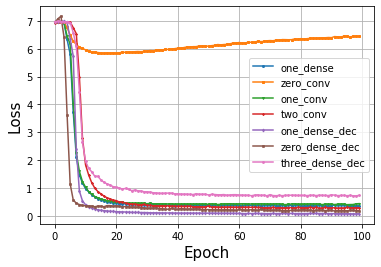

In [82]:
import matplotlib.pyplot as plt


# Plot training & validation loss values history2_just_last_conv
#plt.plot(history.history['loss'])
plt.plot(histories[0].history['val_key_hat_loss'],marker='o',markersize=2)##our arch
#plt.plot(history2_no_last_conv.history['val_key_hat_loss'],marker='s',markersize=5)#without last conv
#plt.plot(history2_just_last_conv.history['val_key_hat_loss'],marker='s',markersize=5)# with last conv only
plt.plot(histories[1].history['val_key_hat_loss'],marker='s',markersize=2)# with just one conv
plt.plot(histories[2].history['val_key_hat_loss'],marker='v',markersize=2)
plt.plot(histories[3].history['val_key_hat_loss'],marker='*',markersize=2)
plt.plot(histories[4].history['val_key_hat_loss'],marker='d',markersize=2)
plt.plot(histories[5].history['val_key_hat_loss'],marker='X',markersize=2)
plt.plot(histories[6].history['val_key_hat_loss'],marker='H',markersize=2)
#plt.title('Model loss',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.grid()

legend = ['one_dense', 'zero_conv', 'one_conv', 'two_conv', 'one_dense_dec','zero_dense_dec','three_dense_dec']
plt.legend(legend,fontsize=10)#Train', 'Test'], loc='upper left')
plt.show()

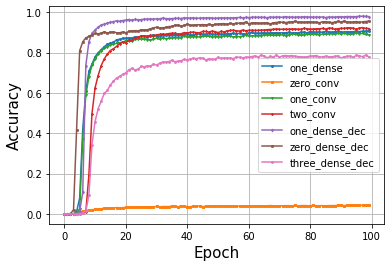

In [81]:
import matplotlib.pyplot as plt


# Plot training & validation loss values
#plt.plot(history.history['loss'])
plt.plot(histories[0].history['val_key_hat_accuracy'],marker='o',markersize=2)
plt.plot(histories[1].history['val_key_hat_accuracy'],marker='s',markersize=2)
plt.plot(histories[2].history['val_key_hat_accuracy'],marker='v',markersize=2)
plt.plot(histories[3].history['val_key_hat_accuracy'],marker='*',markersize=2)
plt.plot(histories[4].history['val_key_hat_accuracy'],marker='d',markersize=2)
plt.plot(histories[5].history['val_key_hat_accuracy'],marker='X',markersize=2)
plt.plot(histories[6].history['val_key_hat_accuracy'],marker='H',markersize=2)

#plt.title('Model Accuracy',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.grid()
legend = ['one_dense', 'zero_conv', 'one_conv', 'two_conv', 'one_dense_dec','zero_dense_dec','three_dense_dec']

plt.legend(legend,fontsize=10)#Train', 'Test'], loc='upper left')

plt.show()

In [92]:
'''
tar = open('val_acc_three_dense_dec.txt','w')
write_array_to_file(histories[6].history['val_key_hat_accuracy'], tar, " ")
tar = open('val_loss_three_dense_dec.txt','w')
write_array_to_file(histories[6].history['val_key_hat_loss'], tar, " ")

'''

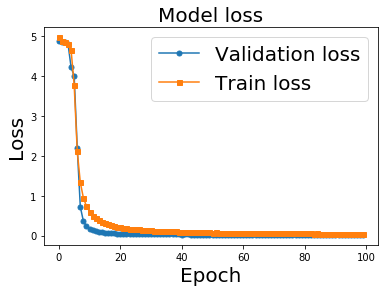

In [31]:
import matplotlib.pyplot as plt


# Plot training & validation loss values
#plt.plot(history.history['loss'])
plt.plot(history.history['val_key_hat_loss'],marker='o',markersize=5)
plt.plot(history.history['key_hat_loss'],marker='s',markersize=5)

plt.title('Model loss',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.grid()

plt.legend(['Validation loss','Train loss'],fontsize=20)#Train', 'Test'], loc='upper left')
plt.show()

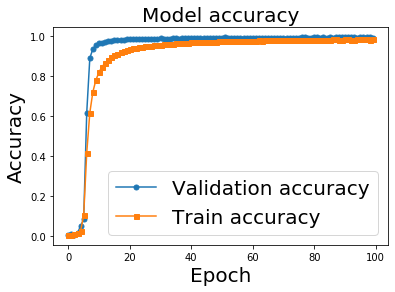

In [32]:
import matplotlib.pyplot as plt


# Plot training & validation loss values
#plt.plot(history.history['loss'])
plt.plot(history.history['val_key_hat_accuracy'],marker='o',markersize=5)
plt.plot(history.history['key_hat_accuracy'],marker='s',markersize=5)

plt.title('Model accuracy',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.legend(['Validation accuracy','Train accuracy'],fontsize=20)#Train', 'Test'], loc='upper left')
plt.show()

Error: 0.021733039823894337


In [49]:
x_test = np.array(X_test_all[0:4997]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test)
pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x22, keys_true = pred[0], pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)

print("Ext Rate:  ", ext_rate)
#28% with 75, with 150 it is 0.41, with 225, we go to 0.43
error = bit_rate_error(keys_true,test_keys)
print('Error:', error)

Ext Rate:   0.839703822293376
Error: 0.08749249549729837


In [ ]:
noise = np.array(noise_for_test[0:n_test]).reshape((-1, sample_size, 1))
fing_ipds = fingerprint_x22 + x_test
non_fing_ipds = noise + x_test

In [65]:
x_test = np.array(X_test_all[0:n_test-1]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length=key_length)  # we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test)
pred = model_10.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x22, keys_true = pred[0], pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys=test_keys)

print("Ext Rate:  ", ext_rate)

Ext Rate:   0.04700940188037608


In [ ]:
We have 0.947 ext_rate when we have 300 pkt, 200, 000 training data and 250 epochs (loss comes down to 0.18), and
key_size is 1024.

In [ ]:
Time to Fit the Model 22027.91614151001, is ~6 hours.
Ext Rate:   1.0 when 1000000 traiing wiht key_length = 500

Same thing with key_length = 1000 is : It stoped before finishing, but it would be 1 since the loss reduced after 16
 epochs to 0.1 in epoch 30.    
#### try the sample_size = 600....
.9838 with 200, 000 training data and key_length = 1000
%88 with 200000 training data and sample size = 300, key Length =1000, epoch = 50
for the sample size 200 to work, we need 200 epochs. since it is improving 0.01 in each epoch after we reach epoch
= 75. Or maybe we needed more training data. (we were using 200K)

In [ ]:
#alpha =25
#pkt = 10,  ext_rate = 0.701, key_length = 20, epoch = 100, n_train = 5000
#usiing uniform (0,alpha) for fingerprint same parameters as above line: ext_rate: 0.54

Time to Fit the Model 2291.7441816329956 = 2291/3600 = 36 minutes?
Ext Rate:   0.978 with 10000 training and 20 keys, with 20,000 it goes to ext_rate = 1
    10000 training and 200 key  ext_rate =0.019
    with 20000 and 200 key ext_rate =0.53
    and with 40, 000 it goes to ext_rate = 1
.

#n_train = 24000 with key_length = 200, epoch = 50, pkt  =100 , ext_rate = 1

In [ ]:
def get_fingerprints_for_ipds(n_train, sample_size, alpha):
    
    #Previous one was all + and the largest value was 50.
   
    fingerprint_output = []
    thrshold = 100
    while len(fingerprint_output) < n_train:
        finger = [0]#[random.uniform(0, 250)]
        neg_numbers = 0
        delay = 0
        for i in range(sample_size - 1):
            #if random.randrange(0, 3) == 0:
            rnd = random.randrange(0, 2)
            if rnd == 1 and delay < thrshold:
                finger.append(alpha)
            elif rnd ==1 and delay>= thrshold:
                finger.append(-alpha)
                
            elif rnd == 0 and delay <= 0 and  delay >-thrshold: # random.randrange(0, 2) == 0:# and np.abs(delay) <50:
                finger.append(-1 * alpha)#
            elif rnd ==0 and delay <=0 and delay <=-thrshold:
                finger.append(alpha)
            elif rnd == 0 and delay > 0:
                finger.append(-1 * alpha)
            delay += finger[-1]
            #print(delay)
            if sum(finger) < 0:
                neg_numbers += 1
#             else:
#                 finger.append(0) 
        #if neg_numbers < 50:  ## this can be a hyperparameter
        fingerprint_output.append(finger)
    return fingerprint_output



y = get_fingerprints_for_ipds(1, 1500, alpha=25) 
y = np.expand_dims(y, axis=1).reshape((-1, 1500, 1))
y = adjust_fingerprint_delays(y)
avg_d, max_d = compute_delay_on_packets(y)

In [ ]:
def adjust_fingerprint_delays(fingerprint_x2):
    number_of_train, sample_size = len(fingerprint_x2), len(fingerprint_x2[0])
    for f in range(0, len(fingerprint_x2)):
            delay, min_delay = 0, 0
            for p in range(0, len(fingerprint_x2[f])):
                    delay += fingerprint_x2[f][p][0]
                    #print(delay)
                    if delay < min_delay:
                        min_delay = delay 
            fingerprint_x2[f][0][0] -= 1.001 * min_delay
           # print("min",min_delay)
           # break
    return fingerprint_x2

def compute_delay_on_packets(fingerprint_x2):
#######Compute the average delay on each packet.        
    average_delay = []
    max_d, pos = 0, 0
    for fing in fingerprint_x2:
        delay, neg = 0, 0
        delays = []
        for n in fing:
            delay += n[0]
            if delay > max_d:
                max_d = delay
            delays.append(delay)

            if delay < 0:
                neg += 1
        if neg == 0:
            pos += 1
            average_delay.append(sum(delays)/sample_size)
   # print(sum(delays)/sample_size," Average Delay")
   # print(sample_size, number_of_train)
    print("Negative delay: ",pos, "Average delay for them:",sum(average_delay)/pos, "Max Delay: ", max_d)
    return sum(average_delay)/pos, max_d
fingerprint_x2 = adjust_fingerprint_delays(fingerprint_x2)
avg_d, max_d = compute_delay_on_packets(fingerprint_x2)


In [ ]:
print(len(x_test),sample_size)

In [ ]:
noise_for_test = np.array(noise_for_test[0:n_test]).reshape((-1, sample_size, 1))
fingerprinted_ipds =  x_test + noise_for_test+ fingerprint_x22 

In [ ]:
for i in range(500):
    target = open("/home/fatemeh/MyProjects/Fingerprint/KS/fing/lap_" + str(i) + ".txt", 'w')
    array = fingerprinted_ipds[i]#x_test[i] + fingerprint_x22[i]
    array = np.squeeze(array)
    write_array_to_file(array, target, " ")

In [ ]:
# TODO: I want to check to see if I 0 the negative fingerprints, I can have the same extraction rate.
model_decoder = load_decoder(key_length, sample_size)
#model_decoder.set_weights(model.get_weights())
beg_time = time.time()
i = 0
for layer in model_10.layers:
  #  w_target=layer.get_weights()
    for dec_layer in model_decoder.layers:
        if layer.name ==dec_layer.name:
            print(layer.name, i)
            dec_layer.set_weights(layer.get_weights())
    i += 1
print("Time it takes to load the decoder: ", time.time() - beg_time)

In [ ]:
def read_fingerprinted_ipds():
    path = '/home/fatemeh/MyProjects/Fingerprint/encoder/ext_ipds/'
    all_ipds = []
    for i in range(11):
        string_ipds = read_from_file(path + str(i) + ".txt").split(" ")
        ipds = convert_stringArrays_to_floatArray(string_ipds)
        all_ipds.append(ipds)
    return all_ipds
all_ipds = read_fingerprinted_ipds()
fingerprinted_ipds=np.array(all_ipds).reshape((-1, sample_size, 1))

In [ ]:
'''
noise_for_test = np.squeeze(noise_for_test)
noise_for_test = get_noise_simulation_array(n_test, std=1, sample_size=sample_size)
noise_for_test=np.array(noise_for_test[0:n_test]).reshape((-1, sample_size, 1))
fingerprinted_ipds = fingerprint_x2 + x_test + noise_for_test
'''


key_hat = model_decoder.predict(fingerprinted_ipds)
ext_rate = compute_extract_rate(key_hat, true_keys=test_keys)
print(ext_rate)

In [ ]:
import csv
# avg_d, max_d = compute_delay_on_each_packet(fingerprint_x2)
rate=100
with open('sep_results.csv', mode='a') as csv_file:
    fieldnames = ['sample_size', 'key_length', "number_training", 'ext_rate', 'average_delay', 'max_delay',
                  'packet_rate', 'std', 'max_train_noise','date']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    #writer.writeheader()
    writer.writerow(
        {'sample_size': sample_size, 'key_length': key_length, "number_training": n_true_train, 'ext_rate': ext_rate,
         'average_delay': avg_d, 'max_delay': max_d, 'packet_rate': rate, 'std': std, 'max_train_noise': max_fing_delay,'date': datetime.datetime.now()})

In [ ]:
#print(X_train[0][0:100])
# print(fingerprint_x2[0][0:100])
array_mult_test2, array_sub_test2, noise_for_test2 = get_arrays_mult_noise_sub(10,max_delay=5,chunk=10,std=5,sample_size=sample_size)

d = 0
import numpy as np
for f in noise_for_test2:
    dd = []
    for p in f:
        dd.append(p)
    std = np.std(dd, axis=0)
    print(std)



In [ ]:

'''
    Ext Rate:   0.9986 for key_length = 20
    5000 52.243792017179196 1500 Max Delay:  194.5090960264206

    Ext Rate:   0.9594 for key_length = 100
    5000 115.39134879171382 1500 Max Delay:  560.9818127155304

    Ext Rate:   0.9344
    5000 240.32056540118285 1500 Max Delay:  1266.3458748834673

    Ext Rate:   0.709,    key_len = 500
    92.47834091258049
    1500 5000
    5000 84.65399134224361 1500 Max Delay:  459.50667464733124

    Ext Rate: 0.5602, key_len = 1000
    28.44295782939593
    1500 5000
    5000 53.95885500007159 1500 Max Delay:  244.45183670520782
'''

'''
Noise is uniform in these experiments:
maxDelay = 5, rate =100
    std = 1
        Ext Rate:   1.0
        34.646455238024394
        1500 4000
        4000 45.05813633905002 1500 Max Delay:  209.10854732990265
    std = 5
        Ext Rate:   1.0
        22.97654592792193
        1500 4000
        4000 36.03301963561987 1500 Max Delay:  146.38326346874237
    std = 100
        Ext Rate:   0.0485
        29.65366893227895
        1500 4000
        4000 28.555992046196685 1500 Max Delay:  157.52952599525452
maxDelay =100, rate =100
    std = 100
        Ext Rate:   0.9985
        422.7813040936788
        1500 4000
        4000 557.8424517351626 1500 Max Delay:  2539.529760360718   
      
'''

In [ ]:
ext_rate = compute_extract_rate(keys_true, true_keys = test_keys)

print("Ext Rate:  ", ext_rate)
compute_delay_on_each_packet(fingerprint_x2)

In [ ]:
import keras.backend as K
from keras import optimizers
n_false_train = 0
x_fing_w, key_hat_w, epoch, batch = 1, 200, 50, 64

beg_time = time.time()
key_length = 100
key_options = selecting_valid_fingerprints(key_length = key_length)
sample_sizes = [1500, 1800]#, 600, 1200]
#models = []
trains = [60000, 10000]
for sam in sample_sizes:
    sample_size = sam
    X_train_all = create_sample_size_dataset(all_ipds_for_train, sample_size = sample_size)
    X_test_all = create_sample_size_dataset(all_ipds_for_test, sample_size = sample_size)
    print(len(X_train_all),len(X_test_all), "Numbre of training and testing data")
    model = get_encoder_decoder_conv_dense_slice(sample_size=sample_size, key_length=key_length, chunk=10)
    ad = optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad=False)

    model.compile(optimizer=ad, loss={'fingerprint':mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
                                    loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w})
    X_train, y_train, train_keys = get_false_true_data(X_train_all, key_options)#get_only_true_data
    train_keys = np.array(train_keys)
    n_test = 4000
    for t in trains:
        # model.summary()
        beg_time = time.time()
        array_mult_train, array_sub_train, noise_for_train = get_arrays_mult_noise_sub(t,max_delay=5,chunk=10,std=1,sample_size=sample_size)
        model.fit([X_train[0:t], train_keys[0:t], array_mult_train[0:t], array_sub_train[0:t], 
                   noise_for_train[0:t]], [y_train[0:t], train_keys[0:t]], epochs=epoch,
                  validation_split=0.1, batch_size=batch,verbose =1)#, validation_split=0.1,callbacks=callbacks_list, verbose=0)

        print("Time to Fit the Model", time.time() - beg_time)
        models.append(model) 
        array_mult_test, array_sub_test, noise_for_test = get_arrays_mult_noise_sub(n_test,max_delay=5,chunk=10,std=1,sample_size=sample_size)

        #### This is when we test encoder and decoder together using the same model: model_encoder_decoder
        x_test = np.array(X_test_all[0:n_test]).reshape((-1, sample_size, 1))
        key_options = selecting_valid_fingerprints(key_length = key_length)# we use 100 keys.
        test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
        noise_for_test = np.squeeze(noise_for_test[0:n_test])
        pred = model.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

        fingerprint_x2, keys_true = pred[0],  pred[1]
        ext_rate = compute_extract_rate(keys_true, true_keys = test_keys)

        print("Ext Rate:  ", ext_rate)
        compute_delay_on_each_packet(fingerprint_x2)
'''

    size = 1800
    Ext Rate:   0.992
    4000 95.84566262555747 1800 Max Delay:  415.03377401828766
    Ext Rate:   0.9765
    4000 93.27346397158448 1800 Max Delay:  380.78301668167114
    
    
    size 1200
    
    Ext Rate:   0.948
    4000 72.26921833757295 1200 Max Delay:  357.55537247657776

    Ext Rate:   0.943
    4000 72.2022527100891 1200 Max Delay:  356.89986884593964
    
    size = 600
    Ext Rate: 0.788
    4000 38.018    max delay: 235.928
    
    size 600, and 10000 training:
    Ext Rate:   0.731
    4000 37.918288900979874 600 Max Delay:  233.056
    

'''

In [ ]:
n_test = 5000
print(sample_size)
array_mult_test, array_sub_test, noise_for_test = get_arrays_mult_noise_sub(n_test,max_delay=5,chunk=10,std=1,sample_size=sample_size)

x_test = np.array(X_test_all[0:n_test]).reshape((-1, sample_size, 1))
key_options = selecting_valid_fingerprints(key_length = 200)# we use 100 keys.
test_keys = np.array(get_keys_for_fingerprinting_data(size=n_test, key_options=key_options))
noise_for_test = np.squeeze(noise_for_test[0:n_test])
pred = model.predict([x_test, test_keys, array_mult_test, array_sub_test, noise_for_test])

fingerprint_x2, keys_true = pred[0],  pred[1]
ext_rate = compute_extract_rate(keys_true, true_keys = test_keys)

print("Ext Rate:  ", ext_rate)
compute_delay_on_each_packet(fingerprint_x2)
'''
sample size = 1800, n_train = 10000, and key = 100:
1800
Ext Rate:   0.0842
52.90532826509741
1800 4444
4444 47.894631279740935 1800 Max Delay:  182.74153697490692
when we only change n_train = 60000:



'''

In [ ]:

def decide_if_fingerprinted(keys, threshold):
    fing = 0
    for key in keys:
        index = np.argmax(key)
        if key[index] > threshold and index > 0:
            fing += 1
    return fing / float(len(keys))

In [ ]:
### Loading encoder takes too much time (hours), so we just use the model_encoder_decoder for encoding.
model_decoder = load_decoder(key_length, sample_size)
decoder_weights = []
j = 0
for i in range(0, 24):
    if 'dec' in model.layers[-(24 - i)].name or 'key_hat' in model.layers[-(24 - i)].name:
        model_decoder.layers[j].set_weights(model.layers[-(24 - i)].get_weights())
        j += 1

In [ ]:
noise_for_test = noise_for_test.reshape((-1, sample_size, 1))

output_fin = noise_for_test[0:n_test] + x_test
keys_true_fp = model_decoder.predict([output_fin])

###### True positve:
output_fin = noise_for_test[0:n_test] + x_test + fingerprint_x2

keys_true_tp = model_decoder.predict([output_fin])
ext_rate = compute_extract_rate(keys_true_tp, test_keys)
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]


for t in thresholds:
    fp = decide_if_fingerprinted(keys_true_fp, t)
    tp = decide_if_fingerprinted(keys_true_tp, t)
    
    print(fp, tp)
print(ext_rate, 'Extraction Rate')
'''

key = 100 training with 1/100 number of false data. sample size = 1800, number of training=20000
0.2395 0.9845
0.156 0.9695
0.093 0.9535
0.043 0.931
0.014 0.8975
0.0055 0.867
0.0005 0.766
0.9685 Extraction Rate
Ext Rate:   0.969
1800 2000
2000 138.32507355565957 1800 Max Delay:  556.0820367336273
##############################################################################################


sample size 3300, training data = 48000, key = 1000

0.293 0.9925
0.1925 0.98
0.115 0.9685
0.0655 0.941
0.022 0.905
0.007 0.8525
0.0 0.734
0.9695 Extraction Rate
2000 80.0513701567251 3300 Max Delay:  369.6583148241043

'''

In [ ]:
n_false_train = 0
x_fing_w, key_hat_w, epoch, batch = 1, 200, 100, 64
model_name = str(sample_size) + "_" + str(key_length) + "_" + str(
    n_true_train) + "_" + str(n_false_train) + "_" + str(epoch) + "_" + str(x_fing_w) + "_" + str(key_hat_w)

beg_time = time.time()
#models_key_length = []
keys = [100]
n_true_train = 30000
for k in keys:

    key_options = selecting_valid_fingerprints(key_length = k)# we use 100 keys.
    X_train, y_train, train_keys = get_false_true_training(X_train_all[0:n_true_train], key_options)
    train_keys = np.array(train_keys)
    print("Finished radinf")

    model= get_encoder_decoder_conv_dense_slice(sample_size=sample_size, key_length=k)
    #losses.mean_squared_error
    ad = optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0, amsgrad=False)

    model.compile(optimizer=ad, loss={'fingerprint':mean_pred_loss, 'key_hat': losses.categorical_crossentropy},
                                    loss_weights={'fingerprint': x_fing_w, 'key_hat': key_hat_w})


    # model.summary()
    print("Model %s is Built and Compiled in %f" % (model_name ,time.time() - beg_time))
    beg_time = time.time()

    model.fit([X_train, train_keys, array_mult_train[0:n_true_train], array_sub_train[0:n_true_train], noise_for_train[0:n_true_train]], [y_train, train_keys], epochs=epoch, validation_split=0.1, batch_size=batch)#, validation_split=0.1,callbacks=callbacks_list, verbose=0)

    print("Time to Fit the Model", time.time() - beg_time)

    
    models_key_length.append(model)




In [ ]:
path_for_results = '/home/fatemeh/Dropbox/Fingerprint/Results/'
def compute_ROC_data(n_train):
    target_name = open(path_for_results + str(n_train)+"_" + str(sample_size)+"_"+str(key_length) + '.txt', 'w')
    sample_size = 900
    key_length = 100
    n_test = 5000
    thresholds = [0.6, 0.7, 0.8, 0.9]
    X = create_sample_size_dataset(all_ipds, sample_size = sample_size)
    key_options = selecting_valid_fingerprints(key_length = key_length)

    


    model_decoder, model_encoder = load_model_for_testing(key_length, sample_size, n_train)
    X_test = np.expand_dims(X[n_train:n_train + n_test], axis=1)
    test_keys = np.expand_dims(get_fingerprint_for_data(size = n_test, key_options = key_options), axis=1)
    fingerprint_x = model_encoder.predict([test_keys])
    false_poses, true_poses = [], []
    
     ########## True positve:
    output_fin = add_gussian_noise_to_ipds_fingerprinted(fingerprint = fingerprint_x, x_test = X_test, std =10)
    keys_true = model_decoder.predict([output_fin])

    ########## False positve: 
    output_non = add_gussian_noise_to_ipds_non_fingerprinted(X_test, std =10)
    keys_false = model_decoder.predict([output_non])
    for t in thresholds:
        true_pos = decide_if_fingerprinted(keys_true, threshold = t)
        false_pos = decide_if_fingerprinted(keys_false, threshold = t)
        false_poses.append(false_pos)
        true_poses.append(true_pos)
        
    write_array_to_file(array = false_poses, target =target_name, delimiter =' ')
    write_array_to_file(array = true_poses, target =target_name, delimiter =' ')
    target_name.close()
    
compute_ROC_data(n_train=10000)

In [ ]:
def compute_impact_of_jitter():
    sample_size = 600
    key_length = 10
    n_train = 50000
    n_test = 5000
    X = create_sample_size_dataset(all_ipds, sample_size = sample_size)
    key_options = selecting_valid_fingerprints(key_length = key_length)

    target_name = open(path_for_results + str(n_train)+"_" + str(sample_size)+"_"+str(key_length) + '.txt', 'w')

    jitters = [1, 10, 50, 100]
   
    model_decoder, model_encoder = load_model_for_testing(key_length, sample_size, n_train)
    X_test = np.expand_dims(X[n_train:n_train + n_test], axis=1)
    test_keys = np.expand_dims(get_fingerprint_for_data(size = n_test, key_options = key_options), axis=1)
    fingerprint_x = model_encoder.predict([test_keys])
    false_poses, true_poses, ext_rates = [], [], []

    for std in jitters:      
        ########## True positve:
        output_fin = add_gussian_noise_to_ipds_fingerprinted(fingerprint = fingerprint_x, x_test = X_test, std =std)
        keys_true = model_decoder.predict([output_fin])
        true_pos = decide_if_fingerprinted(keys_true, threshold=4)
        key_pred = extract_keys_from_key_hat(keys_true)
        error_rate = compute_error_rate_flowwise(predict_key = key_pred, true_key = test_keys)

        ########## False positve: 
        output_non = add_gussian_noise_to_ipds_non_fingerprinted(X_test, std =std)
        keys_false = model_decoder.predict([output_non])
        false_pos = decide_if_fingerprinted(keys_false, threshold=4)
        false_poses.append(false_pos)
        true_poses.append(true_pos)
        ext_rates.append(1 - error_rate)
    write_array_to_file(array = ext_rates, target =target_name, delimiter =' ')
    write_array_to_file(array = false_poses, target =target_name, delimiter =' ')
    write_array_to_file(array = true_poses, target =target_name, delimiter =' ')
    target_name.close()
# compute_impact_of_jitter()

In [ ]:
# x_fing_w, key_hat_w, epoch = 1, 50, 100
def call_fit_load_eval_Main():
    n_all_true_trains =[5000]# [5000, 10000, 20000, 50000]#5000,, 
    sample_sizes = [600]#[400, 200, 600]
    key_lengths = [10]#, 15, 20]

    for sample_size in sample_sizes:
        X = create_sample_size_dataset(all_ipds, sample_size = sample_size)
        for key_length in key_lengths:
            key_options = selecting_valid_fingerprints(key_length = key_length)
            false_poses, true_poses, ext_rates = [], [], []
            target_name = open(path_for_results + str(sample_size)+"_"+str(key_length) + '.txt', 'w')

            for train_number in n_all_true_trains:
                false_pos, true_pos, ext_rate = fit_model_load_evaulte(n_true_train =train_number, key_length=key_length, sample_size=sample_size,X=X,key_options=key_options)
                false_poses.append(false_pos)
                true_poses.append(true_pos)
                ext_rates.append(ext_rate)
                print(false_pos, true_pos, ext_rate)
            write_array_to_file(array = ext_rates, target =target_name, delimiter =' ')
            write_array_to_file(array = false_poses, target =target_name, delimiter =' ')
            write_array_to_file(array = true_poses, target =target_name, delimiter =' ')
            target_name.close()
call_fit_load_eval_Main()

In [ ]:
def reload_model_for_more_epochs():
    sample_size, key_length, n_true_train, epoch = 600, 10, 50000, 250
    n_false_train = int(n_true_train/10)
    x_fing_w, key_hat_w = 1, 50
    model_name = "march_10" + str(sample_size) + "_" + str(key_length) + "_" + str(
    n_true_train) + "_" + str(n_false_train) + "_" + str(epoch) + "_" + str(x_fing_w) + "_" + str(key_hat_w)

    model = load_NN_model(path + model_name)
    model_encoder_decoder.compile(optimizer='adam', 
                              loss=losses.mean_absolute_error,
                                  loss_weights={'fingerprint':x_fing_w, 'key_hat':key_hat_w})

    model_encoder_decoder.fit([X_train, training_keys], [y_train, training_keys],
                        batch_size = 64, epochs = epoch + 250, verbose = 0)
    #save_model_weights(model_encoder_decoder, name=model_name)
# reload_model_for_more_epochs()

In [ ]:
def load_test_all_Main():
    n_all_true_trains = [10000]# 5000, 10000, 20000, 50000]
    sample_sizes = [600]
    key_lengths = [10]
    x_fing_w, key_hat_w, epoch = 1, 50, 100
    n_test = 1000
    for sample_size in sample_sizes:
            
            X = create_sample_size_dataset(all_ipds_for_test, sample_size = sample_size)
            for key_length in key_lengths:
                key_options = selecting_valid_fingerprints(key_length = key_length)
                false_poses, true_poses, ext_rates = [], [], []
                #target_name = open('/home/fatemeh/Dropbox/Fingerprint/Results/500_' + str(sample_size)+"_"+str(key_length) + '.txt', 'w')

                for train_number in n_all_true_trains:
                    model_decoder, model_encoder = load_model_for_testing(key_length, sample_size, train_number)
                    false_pos, true_pos, ext_rate = evalute_encoder_decoder(model_decoder,model_encoder, X, sample_size, key_length,
                                                                            key_options, train_number, int(train_number/10), n_test=n_test)
                    false_poses.append(false_pos)
                    true_poses.append(true_pos)
                    ext_rates.append(ext_rate)
                    print(sample_size, key_length, train_number, "Result: ", false_pos, true_pos, ext_rate)
#                 write_array_to_file(array = ext_rates, target =target_name, delimiter =' ')
#                 write_array_to_file(array = false_poses, target =target_name, delimiter =' ')
#                 write_array_to_file(array = true_poses, target =target_name, delimiter =' ')
#                 target_name.close() 
load_test_all_Main()

In [ ]:
n_true_trains = [5000, 10000, 20000, 50000, 100000]
sample_size, key_length = 600, 10
epoch = 250
for n_true_train in n_true_trains:
    n_false_train = int(n_true_train/10)
    key_hat_w, x_hat_w = 50, 1
    model_name = "march10_" + str(sample_size) + "_" + str(key_length) + "_" + str(
        n_true_train) + "_" + str(n_false_train) + "_" + str(epoch) + "_" + str(x_hat_w) + "_" + str(key_hat_w)

    model = load_NN_model(path + model_name)

    X_train, y_train, training_keys = get_false_true_training(n_true_train, n_false_train, key_length, X, key_options)
    print("Finished reading dataset")

    model.compile(optimizer='adam', 
                                  loss=losses.mean_absolute_error,
                                      loss_weights={'fingerprint':1, 'key_hat':50})
    model.fit([X_train, training_keys], [y_train, training_keys],
                            batch_size = 64, epochs = epoch, verbose = 0)
    
    model_name = "march10_" + str(sample_size) + "_" + str(key_length) + "_" + str(
        n_true_train) + "_" + str(n_false_train) + "_" + str(500) + "_" + str(x_hat_w) + "_" + str(key_hat_w)

    save_model_weights(model, name= model_name)


In [ ]:
def load_encoder(key_length, sample_size):
    chunk, p = 10, 0
    Input_ipd = Input(shape=(sample_size, 1), name='input1')  # this is needed just for the decoding
    Input_key = Input(shape=(key_length,), name='input2')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    
    ipd = Flatten(name ="ipd_flatten1")(Input_ipd)
    outputs = []
    
    quant = int(sample_size/chunk)
    def slice(x):
        return x[:, p * chunk:(1 + p) * chunk]
    
    key1 = Dense(32, name='key1')(Input_key)

    sliced_ipd = Lambda(slice)(ipd)
    x_fingerprint = sliced_ipd
    for i in range(0, quant):
        sliced_ipd = Lambda(slice)(ipd)
        ss = Concatenate(name = 'concat'+ str(p))([x_fingerprint, sliced_ipd]) 
        ipd1 = Dense(32, name = 'dense'+ str(p))(ss)
        batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
        relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)
        
        ipds_merged_all = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
        dense_enc1 = Dense(64, name = 'dense_enc1' + str(p))(ipds_merged_all)
        batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
        relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
        dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
        x_fingerprint_sig = Dense(chunk, name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
        x_fingerprint_mult = Multiply(name = 'fingerprint_mult' + str(p))([x_fingerprint_sig, fingerprint_mult])
        x_fingerprint = Add(name = 'ipd_delay' + str(p))([x_fingerprint_mult, fingerprint_sub])
        outputs.append(x_fingerprint)
        p += 1
    x_fingerprint = Concatenate(name = 'fingerprint2')(outputs)
    x_fingerprint_output = Reshape((sample_size,1), name='fingerprint')(x_fingerprint)
    model_encoder = Model(inputs=[Input_key,Input_ipd,  fingerprint_mult, fingerprint_sub], outputs=[x_fingerprint_output])
    #model_encoder.load_weights(filepath=path + model_name + ".h5", by_name=True)
    return model_encoder
